In [ ]:
clas FIELD(Enum):       
        ELECTRIC = [1,['0_0', '0_1', '0_2'],[r'E_x', r'E_y', r'E_z']]
        CURRENT = [1,['1_0', '1_1', '1_2'],[r'J_x', r'J_y', r'J_z']]
        VELOCION = [1,['2_0', '2_1', '2_2'],[r'v_{ion,x}', r'v_{ion,y}', r'v_{ion,z}']]
        DENSELEC = [1,['3_0'],[r'n_e']]
        PRESSURE = [1,['4_0', '4_1', '4_2','4_3', '4_4', '4_5'],
                    [r'P_{xx}', r'P_{xy}', r'P_{xz}', r'P_{yy}', r'P_{yz}', r'P_{zz}']]
        DENSITY = [1,['5_0']]
        VELOCITY = [1,['5_1', '5_2', '5_3']]
        DENSITY1 = [1,['6_0']]
        VELOCITY1 = [1,['6_1', '6_2', '6_3']]
        DENSITY2 = [1,['7_0']]
        VELOCITY2 = [1,['7_1', '7_2', '7_3']]
        MAGNETIC = [1,['8_0', '8_1', '8_2'],[r'B_x', r'B_y', r'B_z']]
        RESIST = [1,['9_0', '9_1']]
        
        VELOCION = [1,['2_0', '2_1', '2_2'],[r'$v_{ion,x}$', r'$v_{ion,y}$', r'$v_{ion,z}$']]
        DENSELEC = [1,['3_0'],[r'$n_e$']]
        PRESSURE = [1,['4_0','4_3', '4_5'],
                    [r'$P_{xx}$', r'$P_{yy}$', r'$P_{zz}$']]

In [6]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
import collections
from pylab import meshgrid
import os


%matplotlib inline


        
class FIELD(Enum):
        ELECTRIC = [1,['0_2'],[r'$E_z$']]
        CURRENT = [1,[ '1_2'],[ r'$J_z$']]
        MAGNETIC = [1,[ '8_1'],[ r'$B_y$']]
        



                    
def loadData(fileName):           
        f = h5py.File(fileName, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        for fld in UFIELD:
                VAR0_name = 'vars/'+fld.value[1][0]
                SHAPE = f[VAR0_name].shape            
                Lx=SHAPE[0]
                Ly=SHAPE[1]
                Lz=SHAPE[2]
                data = np.zeros([Lx, Ly, Lz,  6])
                idx = 0
                for field in fld.value[1]:
                    VAR_name = 'vars/'+field
                    data[...,idx] = f[VAR_name][...]
                    idx += 1
                    allData[fld] = data                   
        f.close()
        return allData
        
        
def loadVar(fileName, fld):           
        f = h5py.File(fileName, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        VAR0_name = 'vars/'+fld.value[1][0]
        SHAPE = f[VAR0_name].shape    
        Lx=SHAPE[0]
        Ly=SHAPE[1]
        Lz=SHAPE[2]
        data = np.zeros([Lx, Ly, Lz, len(fld.value[1])])
        idx = 0
        for field in fld.value[1]:
            VAR_name = 'vars/'+field
            data[...,idx] = f[VAR_name]
            idx += 1
            
        f.close()
        return data
    
def loadVarComp(fileName, fld, comp):           
        f = h5py.File(fileName, 'r')
        allData = collections.defaultdict(lambda: np.ndarray(0))
        VAR0_name = 'vars/'+fld.value[1][0]
        SHAPE = f[VAR0_name].shape    
        Lx=SHAPE[0]
        Ly=SHAPE[1]
        Lz=SHAPE[2]
        data = np.zeros([Lx, Ly, Lz])
        VAR_name = 'vars/'+fld.value[1][comp]
        data[...] = f[VAR_name]
            
        f.close()
        return data
    

C:\Games\Python\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


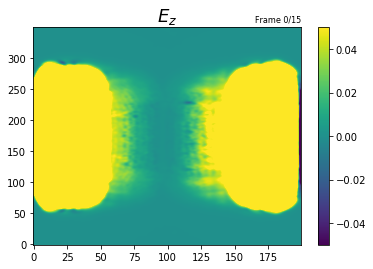

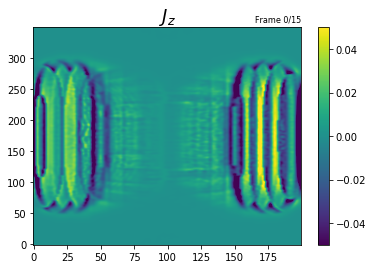

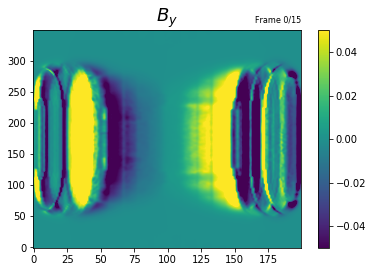

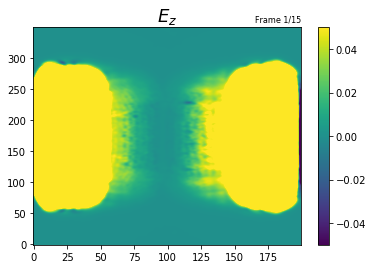

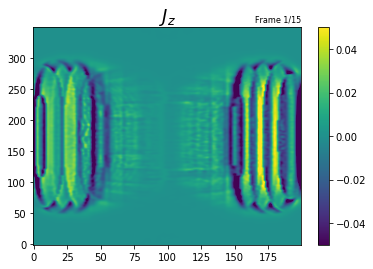

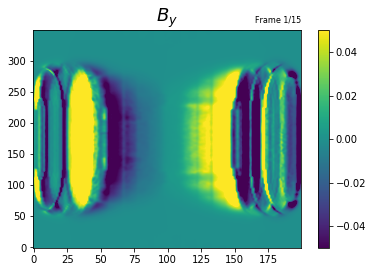

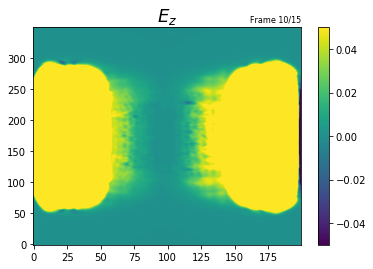

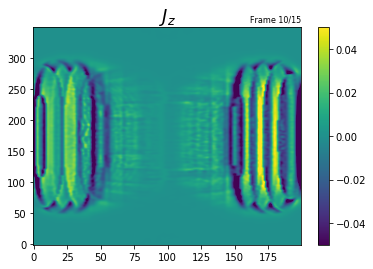

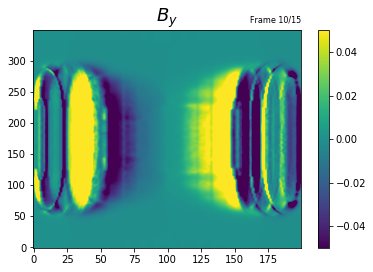

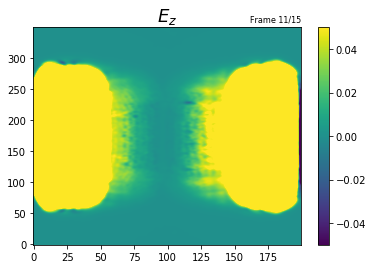

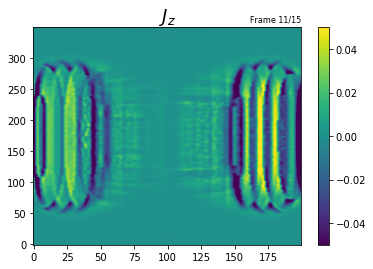

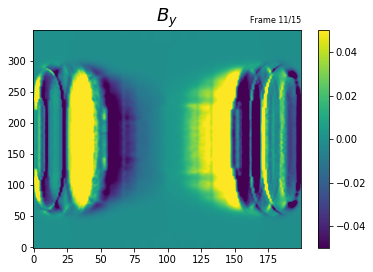

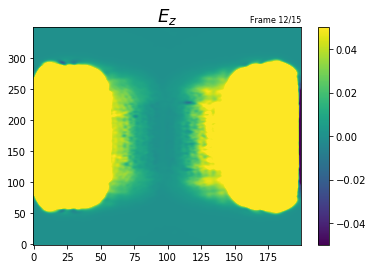

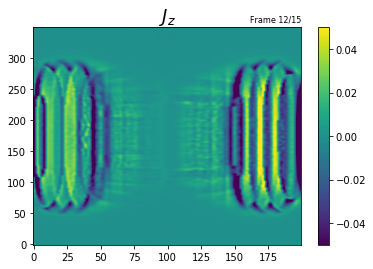

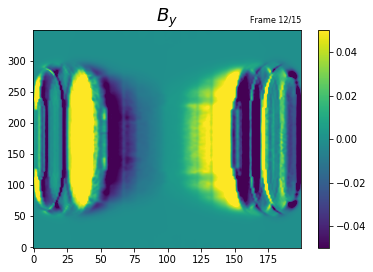

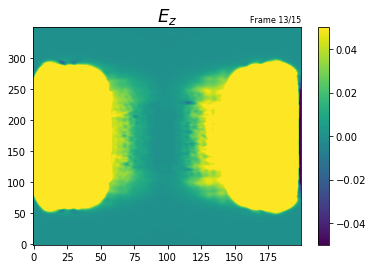

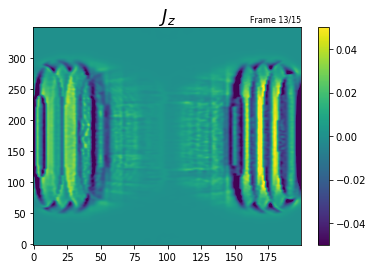

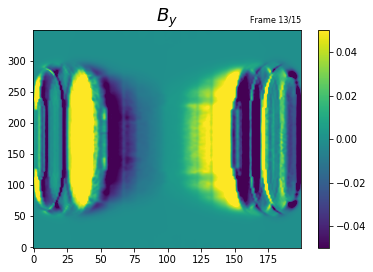

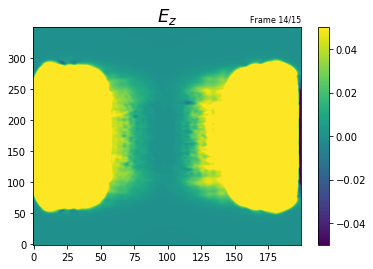

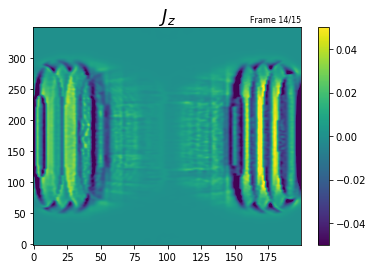

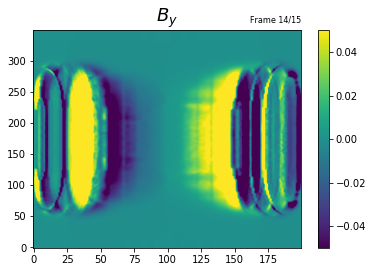

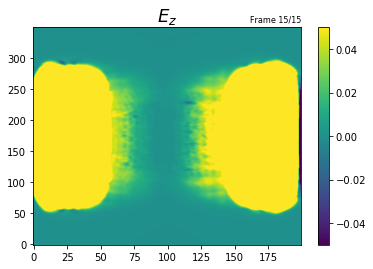

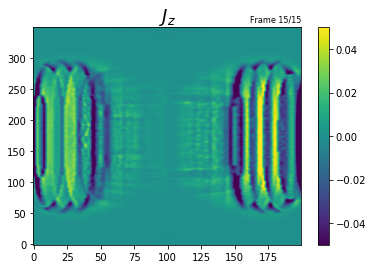

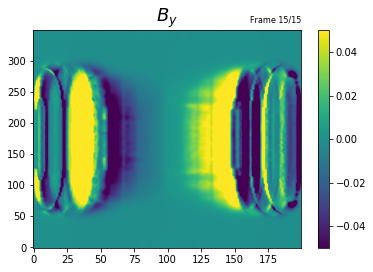

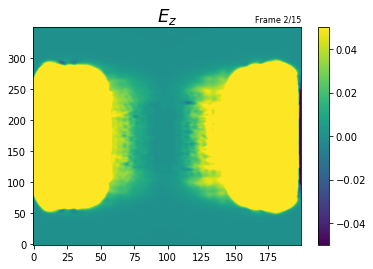

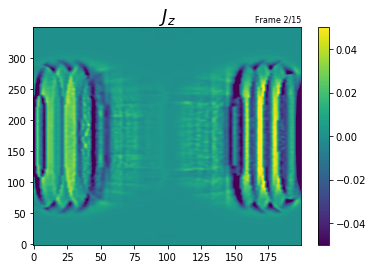

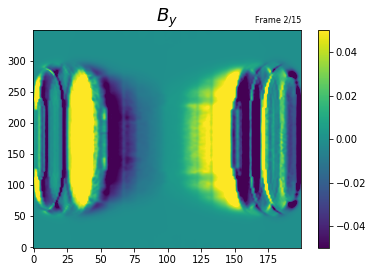

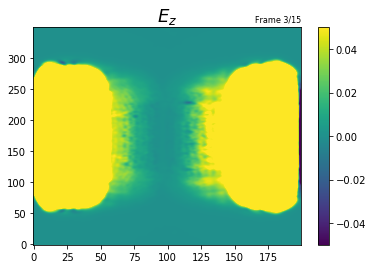

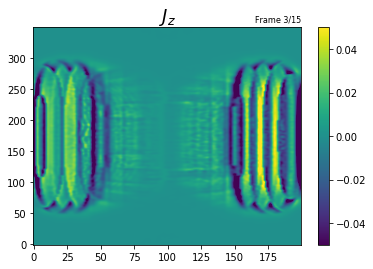

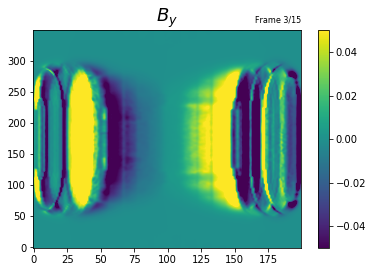

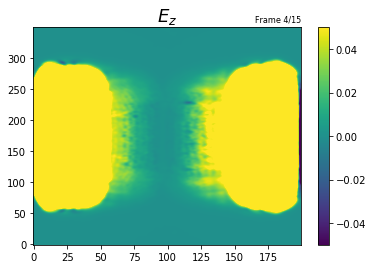

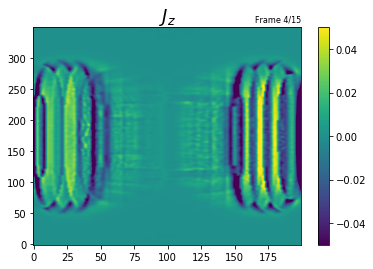

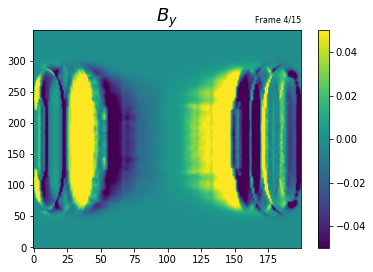

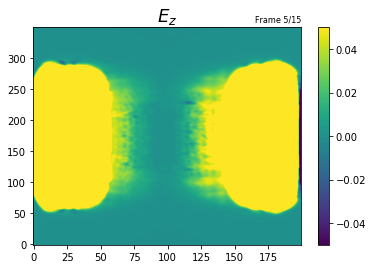

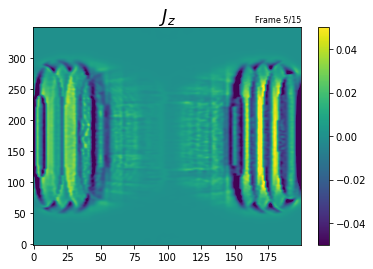

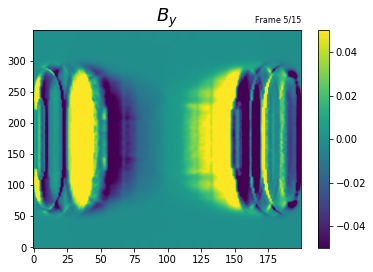

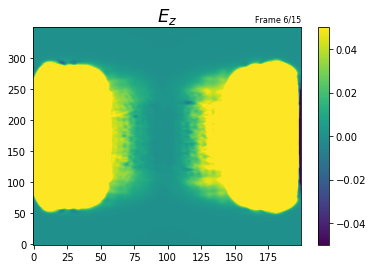

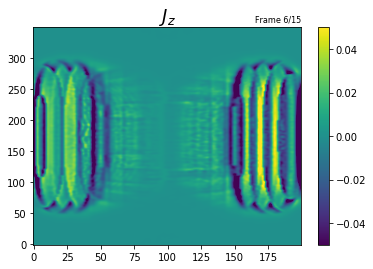

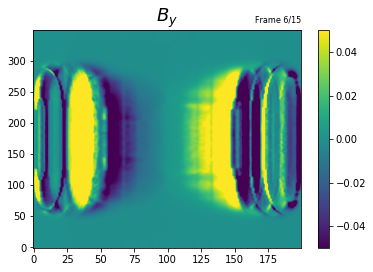

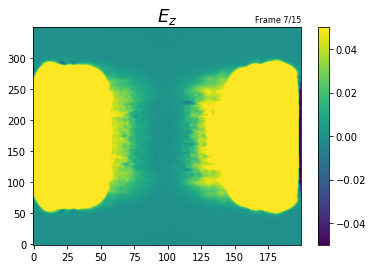

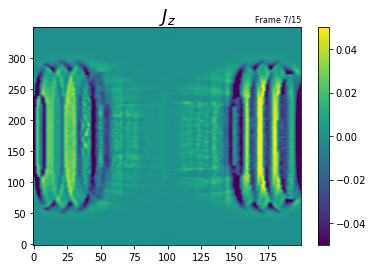

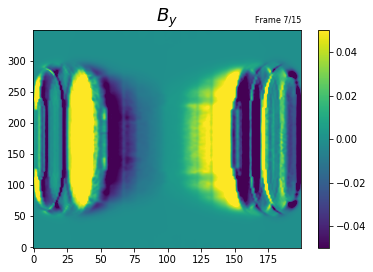

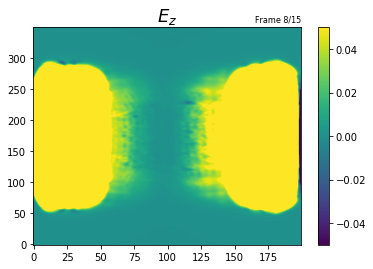

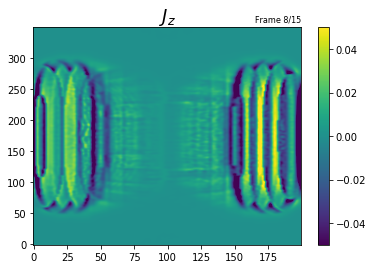

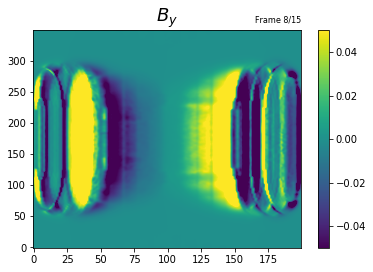

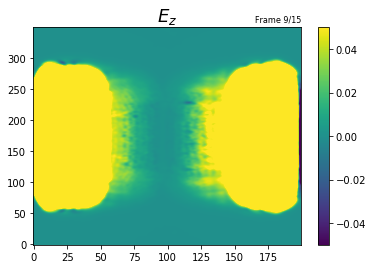

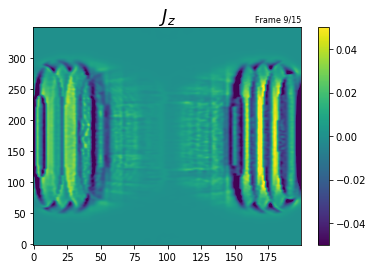

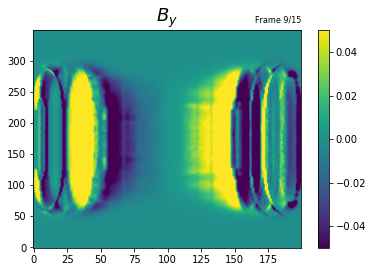

In [150]:
#not really convenient dispaly, just for testing purposes

from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML # to show the animation in Jupyter
import os

z=15

for filename in os.listdir():
    if filename.endswith(".h5"):
        numfr = str(filename.split('.')[0].split('_')[2])
        for fld in FIELD:
            for field in fld.value[1]:
                title = fld.value[2][0]
                data2Plt = loadVarComp(fileName, fld, 0)
                [lx, ly, lz] = data2Plt.shape

                fig, ax = plt.subplots() # creating my fig
                camera = Camera(fig)# the camera gets the fig we'll plot
                vmax = 0.05
                c=ax.imshow( np.transpose(data2Plt[...,z]),
                    origin = 'lower', vmin = -vmax, vmax = vmax,
                    interpolation='bicubic')
                fig.gca().set_aspect('auto')
                plt.title( str(title) , fontsize=18)
                plt.title('Frame '+str(numfr)+'/15', loc='right', fontsize=8)
                camera.snap() # the camera takes a snapshot of the plot
                fig.colorbar(c)


                #animation.save('Frame '+str(numfr)+ str(title) + '.mp4')
                

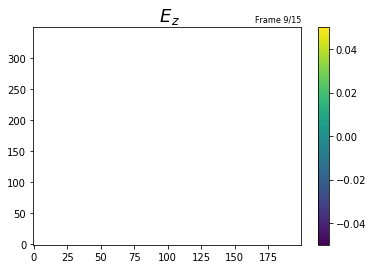

In [142]:
#Frame by frame animation of the slices, individual tests

from celluloid import Camera # getting the camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML # to show the animation in Jupyter
import os

fileName = 'tilt_laser3D_9.h5'
numfr=str(filename.split('.')[0].split('_')[2])
data2Plt = loadVarComp(fileName, FIELD.ELECTRIC, 2)
[lx, ly, lz] = data2Plt.shape

fig, ax = plt.subplots() # creating my fig
camera = Camera(fig)# the camera gets the fig we'll plot
for i in range(0,175,10):
    vmax = 0.05
    c=ax.imshow( np.transpose(data2Plt[...,i]),
              origin = 'lower', vmin = -vmax, vmax = vmax,
             interpolation='bicubic')
    fig.gca().set_aspect('auto')
    plt.title( r' $E_z$', fontsize=18)
    plt.title('Frame '+str(numfr)+'/15', loc='right', fontsize=8)
    camera.snap() # the camera takes a snapshot of the plot
fig.colorbar(c)


animation = camera.animate() # animation ready
#animation.save('Frame '+str(numfr)+" 8_1.mp4")
HTML(animation.to_html5_video()) # displaying the animation

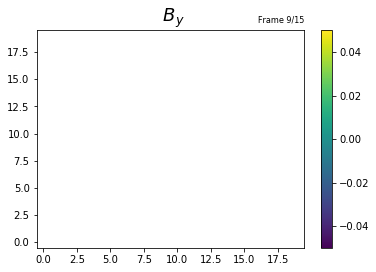

In [141]:
#focus on specific regions
fileName = 'tilt_laser3D_9.h5'

fig, ax = plt.subplots() 
camera = Camera(fig)# the camera gets the fig we'll plot

data2Plt = loadVarComp(fileName, FIELD.MAGNETIC, 1)
[lx, ly, lz] = data2Plt.shape
plt.title(r'$\alpha meow$')

lz = 15
lx1=90
lx2=110
ly1=150
ly2=200
vmax = 0.05

for i in range(0,175,10):
    vmax = 0.05
    c=ax.imshow( np.transpose(data2Plt[90:110,140:160,i]),
              origin = 'lower', vmin = -vmax, vmax = vmax,
             interpolation='bicubic')
    fig.gca().set_aspect('auto')
    plt.title( r' $B_y$', fontsize=18)
    plt.title('Frame '+str(numfr)+'/15', loc='right', fontsize=8)
    camera.snap() # the camera takes a snapshot of the plot
fig.colorbar(c)

animation = camera.animate() # animation ready
#animation.save('Frame '+str(numfr)+" 8_1.mp4")
HTML(animation.to_html5_video()) # displaying the animation

In [47]:
data2 = data2Plt[lx1:lx2,ly1:ly2,lz]
data2.mean()

-1.4536234461966234e-05

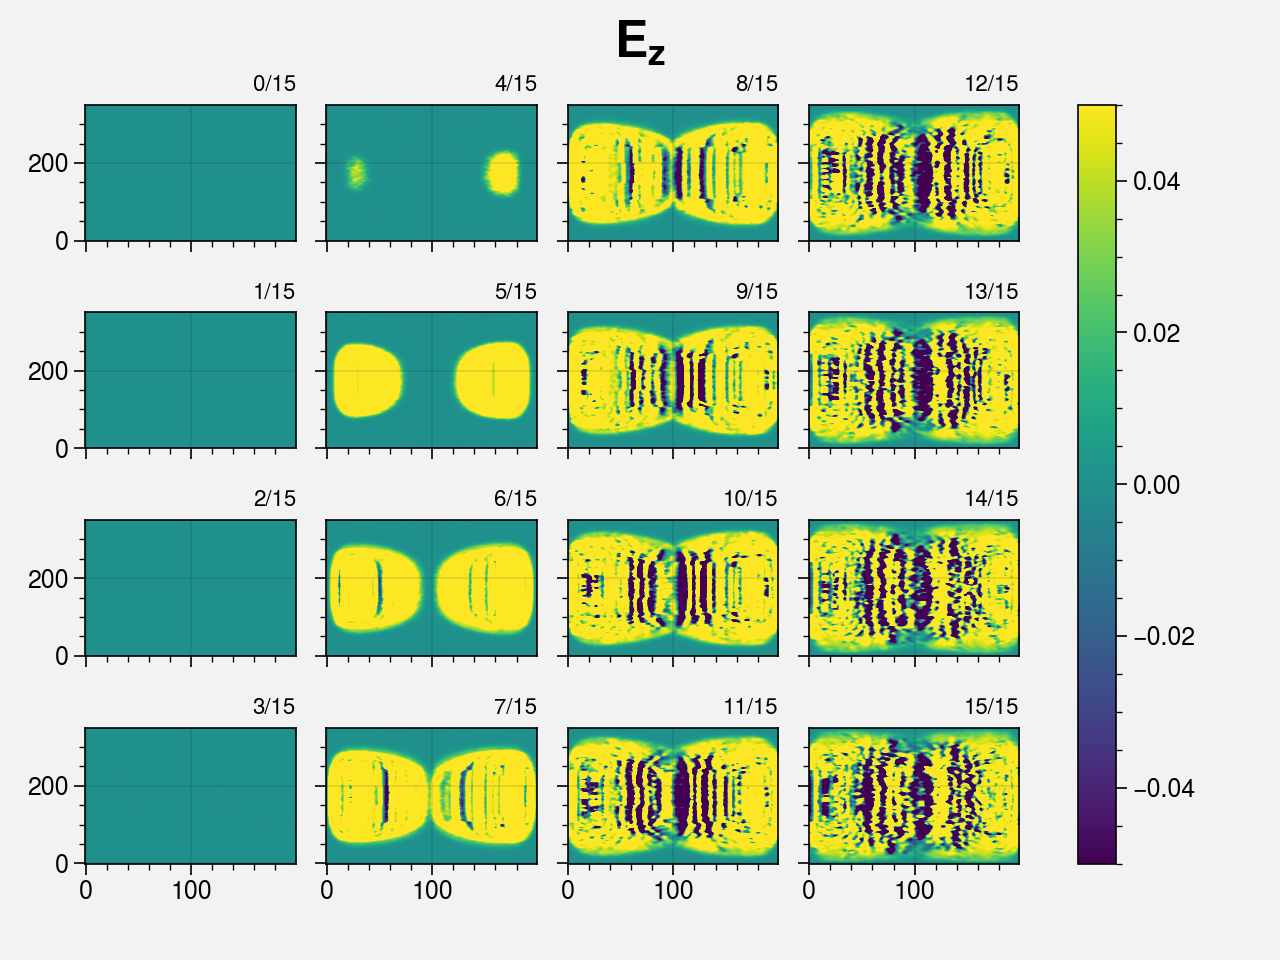

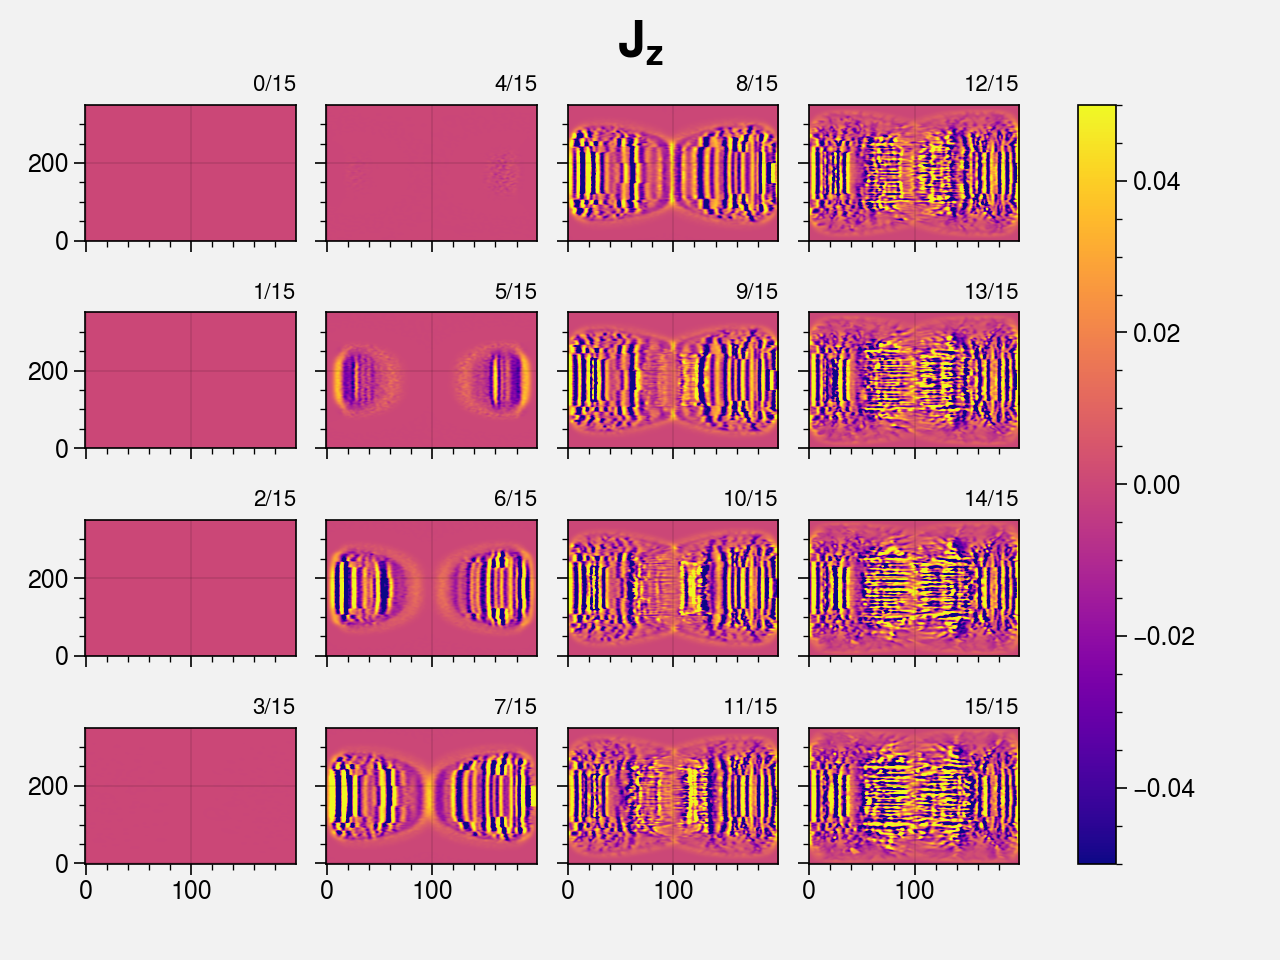

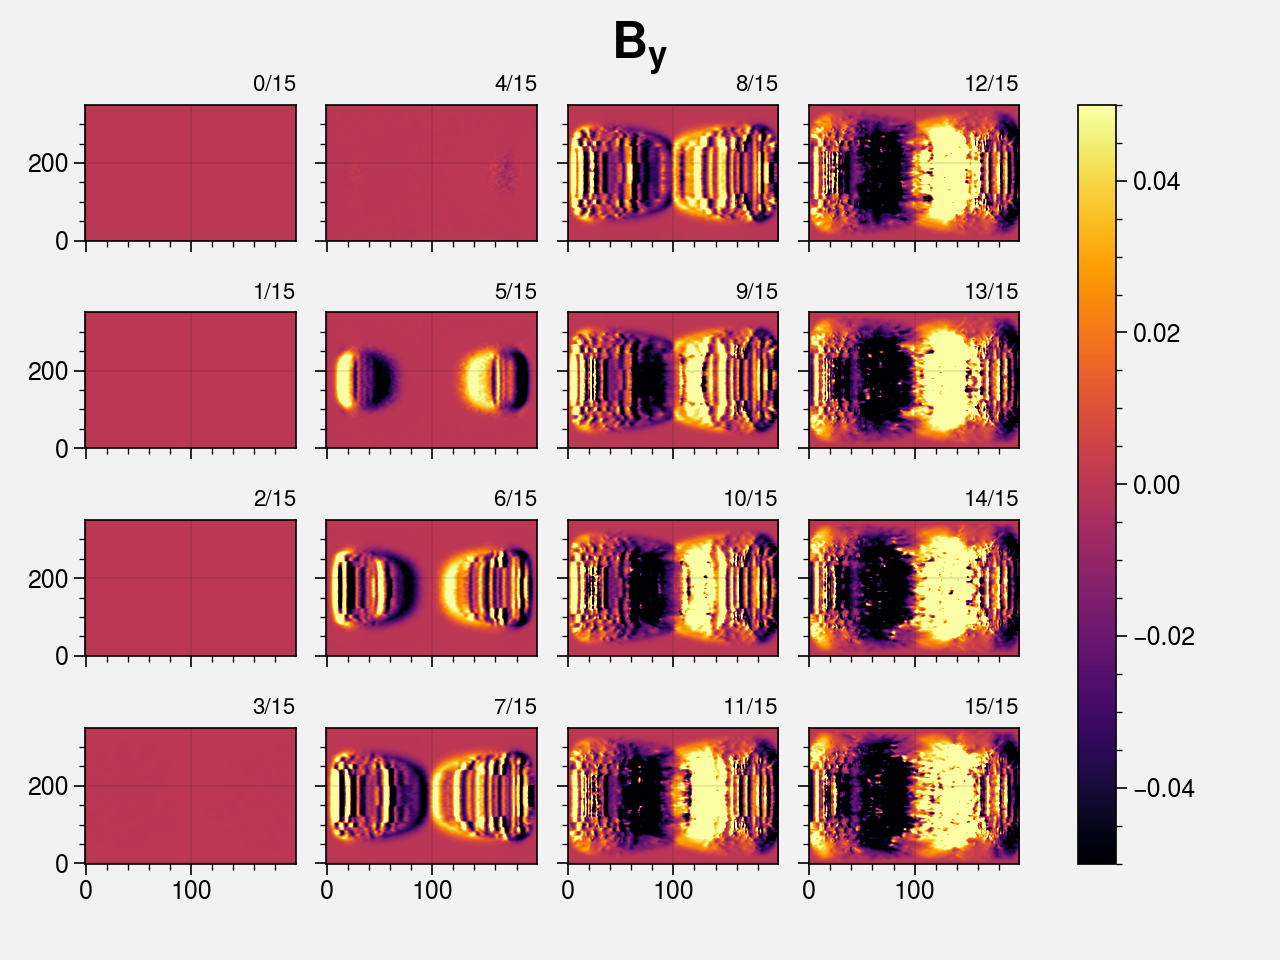

In [7]:
#angle 0 quantities

col=['viridis', 'plasma', 'inferno']

z=85 #this one needs to increase as the time increases, since the reconnection region moves in space
i=0

for fld in FIELD: #Go through relevant physical quantities
    fig,axis = plt.subplots(4, 4, sharex=True, sharey=True)
    title = fld.value[2][0]
    fig.suptitle( str(title) , fontsize=18)
    for field in fld.value[1]:
        for filename in os.listdir():
            if filename.endswith(".h5"):
                numfr = str(filename.split('.')[0].split('_')[2])
        
                data2Plt = loadVarComp(filename, fld, 0)
                [lx, ly, lz] = data2Plt.shape
                vmax = 0.05
                x=int(numfr)%4
                y=int((int(numfr)-x)/4)
                c=axis[x,y].imshow( np.transpose(data2Plt[...,z]),
                        origin = 'lower', vmin = -vmax, vmax = vmax,
                        interpolation='bicubic', cmap=col[i])
                axis[x,y].set_aspect('auto')
                axis[x,y].set_title(str(numfr)+'/15', loc='right', fontsize=8)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.colorbar(c, ax=axis)
    i+=1
    

In [ ]:
#this one should be placed in the root directory, same level as the folders p00_h5, so should 
#do the same as was done  above, for the three angles, hence yielding 9 figures
#needs permission privileges to be ran (to work with folders on a different level in the directory)

color = ['viridis', 'plasma', 'inferno']
#just for better colors

direc = [('p007h5', r'$tg\alpha = 0$'), ('p008h5', r'$tg\alpha = 0.09$'), ('p009h5', r'$tg\alpha = 0.37$')]
#data files in h5 format 

z=45
i=0

for fld in FIELD: #Go through relevant physical quantities
    
    fig,axis = plt.subplots(4, 4, sharex=True, sharey=True) #16 plots corresponding to timesteps from 0 to 15
    title = fld.value[2][0]
    fig.suptitle( str(title) , fontsize=18)
    
    for field in fld.value[1]: #Iterating through relevant component of physical quantities
        
        for j in range(3): #iterating through the 3 angles for alpha
            
            print(direc[j][1])
            for filename in os.listdir(direc[j][0]): #going through the 16 h5 files
                
                if filename.endswith(".h5"):
                    print(direc[j][0])
                    numfr = str(filename.split('.')[0].split('_')[2]) #getting frame number out of 15

                    data2Plt = loadVarComp(filename, fld, 0)
                    [lx, ly, lz] = data2Plt.shape

                    vmax = 0.05 #color gradient parameter

                    x=numfr%4 #coordinates for placing in the 4x4 grid
                    y=numfr//4

                    c=axis[x,y].imshow( np.transpose(data2Plt[...,z]),
                            origin = 'lower', vmin = -vmax, vmax = vmax,
                            interpolation='bicubic', cmap=color[i]) #creating the "colormap" type image

                    axis[x,y].set_aspect('auto') #setting the dimensions the box of each plot
                    axis[x,y].set_title(str(numfr)+'/15', loc='right', fontsize=8)
                    
            plt.show()
                
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) #positionning the title and suptitles
    
    fig.colorbar(c, ax=axis)
    
    i+=1 #different color scale for different physical quantity
    